# part- 1

#• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

#• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

#• PROJECT OBJECTIVE: Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.

1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.

2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values.

3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

4. Data pre-processing:
• Segregate predictors vs target attributes
• Perform normalisation or scaling if required.
• Check for target balancing. Add your comments.
• Perform train-test split.

5. Model training, testing and tuning:
• Design and train a KNN classifier.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Automate the task of finding best values of K for KNN.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

6. Conclusion and improvisation:
• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#import 'Normal.csv'
data1 = pd.read_csv('Part1 - Normal.csv')

In [3]:
data1.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [4]:
data1.shape

(100, 7)

In [5]:
data1.size

700

In [6]:
data2 = pd.read_csv('Part1 - Type_H.csv')

In [7]:
data2.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [8]:
data2.shape

(60, 7)

In [9]:
data2.size

420

In [10]:
data3 = pd.read_csv('Part1 - Type_S.csv')

In [11]:
data3.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

In [12]:
data3.shape

(150, 7)

In [13]:
data3.size

1050

In [14]:
# import merge values data1,data2
data = pd.merge(data1, data2, how = 'outer')

In [15]:
data.shape

(160, 7)

In [16]:
data.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [17]:
data0 = pd.merge(data, data3, how = 'outer')

In [18]:
data0.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [19]:
data0.shape

(310, 7)

In [20]:
data0.size

2170

In [21]:
data0["Class"].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [22]:
data0["Class"] = data0["Class"].str.replace(r"Nrmal","Normal")
data0["Class"] = data0["Class"].str.replace(r"tp_s","Type_S")
data0["Class"] = data0["Class"].str.replace(r"type_h","Type_H")

# data cleaning

In [23]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {data0.shape}")
totalrows=data0.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")


 Shape of the dataframe = (310, 7)
 Total number of rows in the dataset =  310


In [24]:
# Print columns in the data set
data0.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [25]:
# Number of records(rows) in the dataframe
len(data0)

310

In [26]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
data0.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [27]:
# No null values are found

In [28]:
# Checking data type of each colunm to check if any type needs to be changed

In [29]:
data0.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [30]:
data.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   160.000000  160.000000  160.000000  160.000000  160.000000  160.000000
mean     50.167680   14.537932   40.512949   35.629748  121.109885    2.296702
std      11.898309    7.198617   12.080560    9.818035    9.800193    6.012003
min      26.147921   -5.845994   14.000000   13.366931   84.241415  -11.058179
25%      41.709201    9.920628   32.353989   29.225645  115.553188   -1.301069
50%      48.567273   14.176111   38.500000   34.694676  121.040944    1.717861
75%      56.189587   19.283796   47.547636   41.894534  127.263106    5.612368
max      89.834676   41.557331   90.563461   67.195460  147.894637   31.172767

In [31]:
data0.dtypes.value_counts()

float64    6
object     1
dtype: int64

 # Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

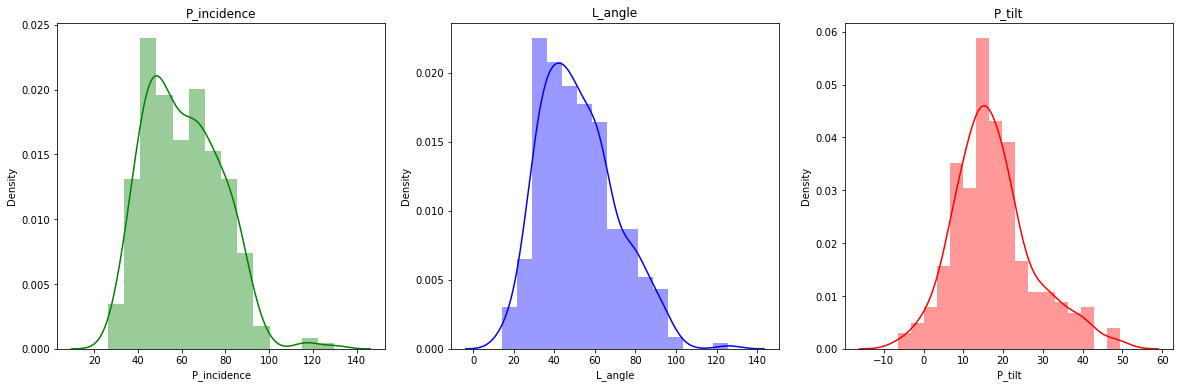

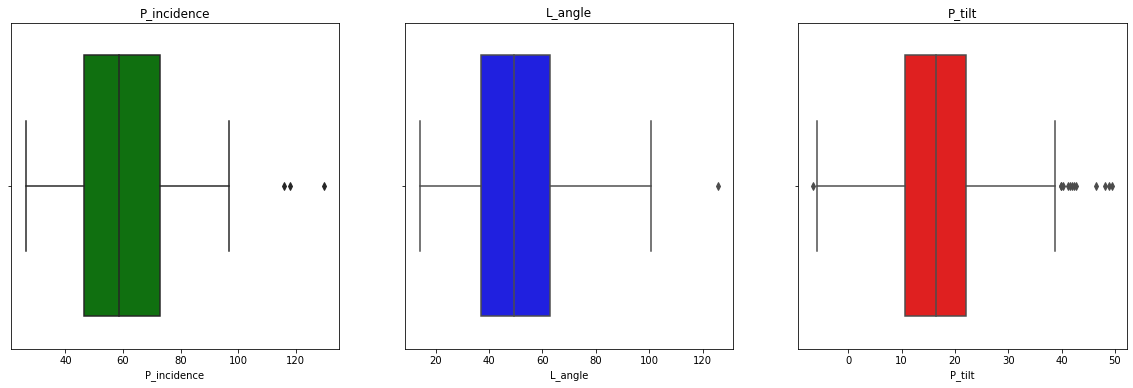

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.distplot(data0['P_incidence'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('L_angle')
sns.distplot(data0['L_angle'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('P_tilt')
sns.distplot(data0['P_tilt'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.boxplot(data0['P_incidence'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('L_angle')
sns.boxplot(data0['L_angle'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('P_tilt')
sns.boxplot(data0['P_tilt'],orient='vertical',color='red')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

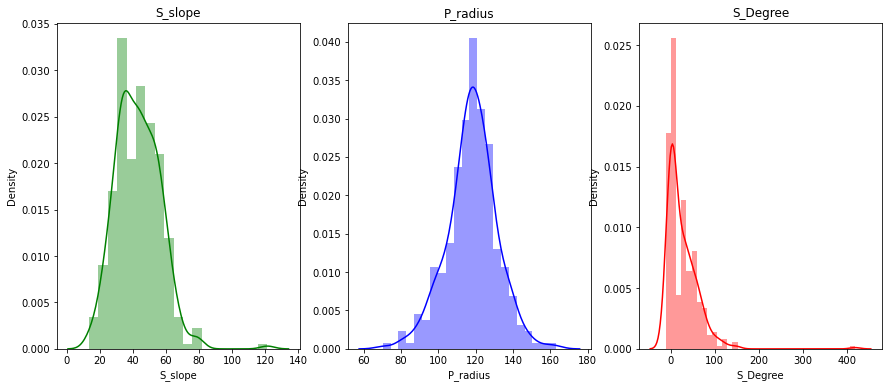

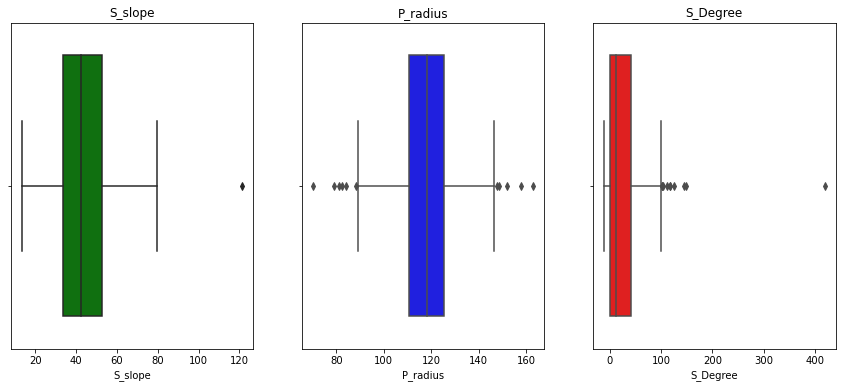

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('S_slope')
sns.distplot(data0['S_slope'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('P_radius')
sns.distplot(data0['P_radius'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('S_Degree')
sns.distplot(data0['S_Degree'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('S_slope')
sns.boxplot(data0['S_slope'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('P_radius')
sns.boxplot(data0['P_radius'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('S_Degree')
sns.boxplot(data0['S_Degree'],orient='vertical',color='red')



plt.show()

In [34]:
fig, ax = plt.subplots(figsize=(50,50))
width = len(data0['S_slope'].unique()) + 20
fig.set_size_inches(width , 75)
ax=sns.countplot(data = data0, x= 'S_slope') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data0)*310,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(50, 50), textcoords='offset points')

In [35]:
fig, ax = plt.subplots(figsize=(50,50))
width = len(data0['L_angle'].unique()) + 20
fig.set_size_inches(width , 75)
ax=sns.countplot(data = data, x= 'L_angle') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data0)*310,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(50, 50), textcoords='offset points')

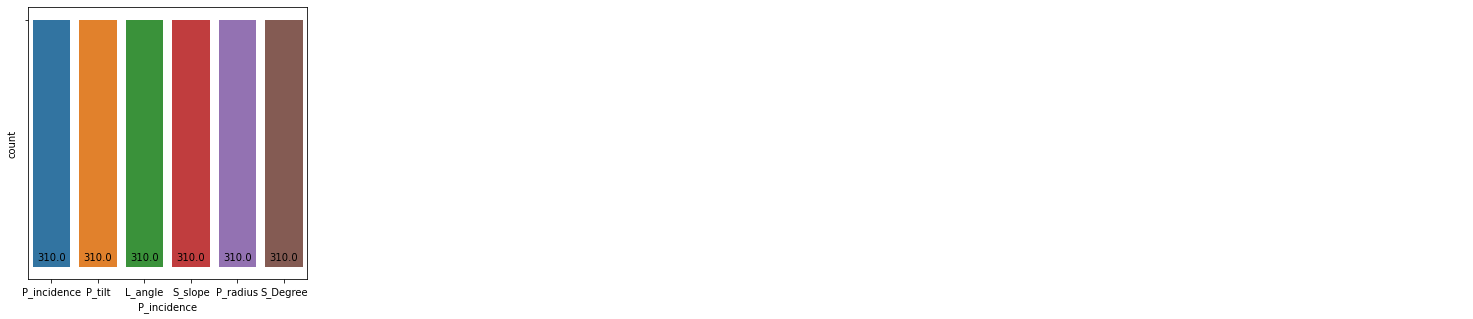

In [36]:
plt.figure(figsize=(5,5))
splot=sns.barplot(x='P_incidence',data=data0)
ax=sns.countplot(data = data0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),(p.get_x()+p.get_width() / 2.,p.get_height()), ha= 'center' , va= 'center', xytext = (0,9),textcoords = 'offset points')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


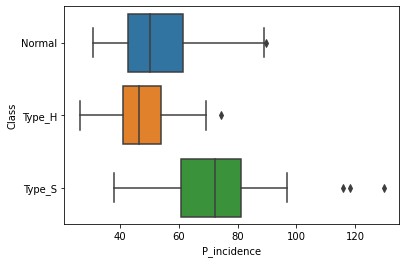

In [37]:
sns.boxplot(data0['P_incidence'],data0['Class']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


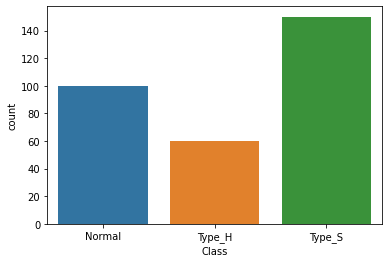

In [38]:
sns.countplot(data0['Class']);

# Bivariate Analysis

In [39]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = data0.corr()
corr.style


In [40]:
corr.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
dtype: object

<AxesSubplot:xlabel='P_radius', ylabel='P_incidence'>

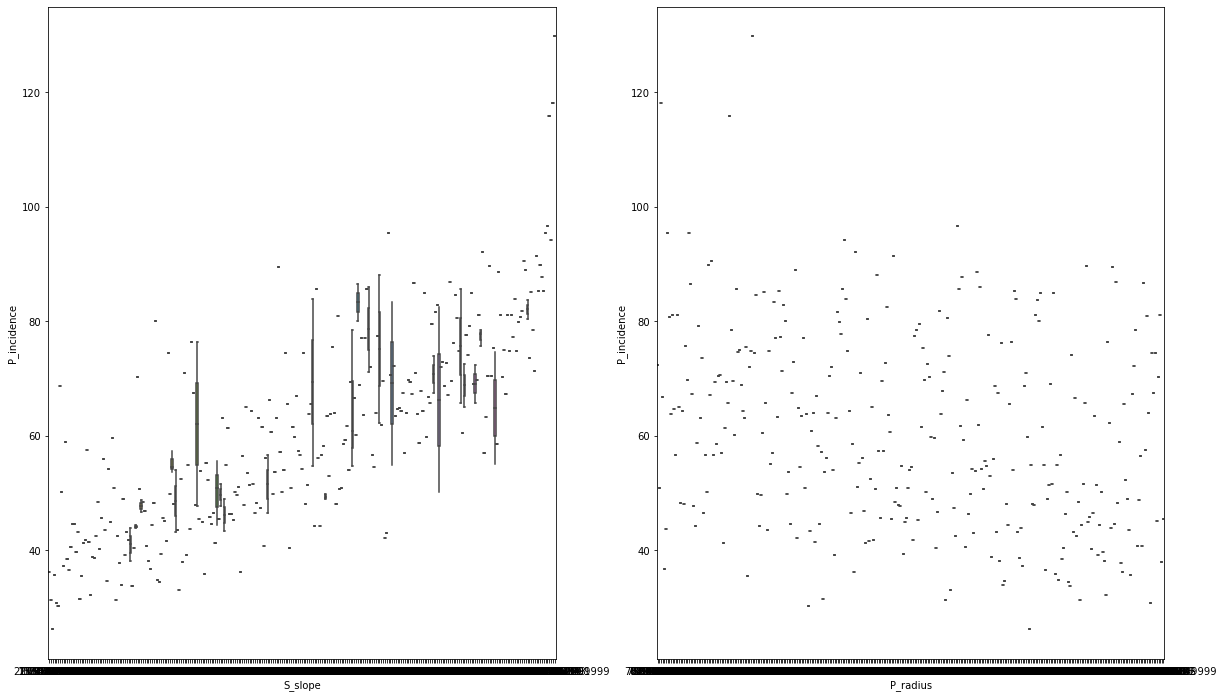

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'S_slope', y = 'P_incidence', data = data0)
plt.subplot(1,2,2)
sns.boxplot(x = 'P_radius', y = 'P_incidence', data = data0)

<AxesSubplot:xlabel='P_radius', ylabel='S_Degree'>

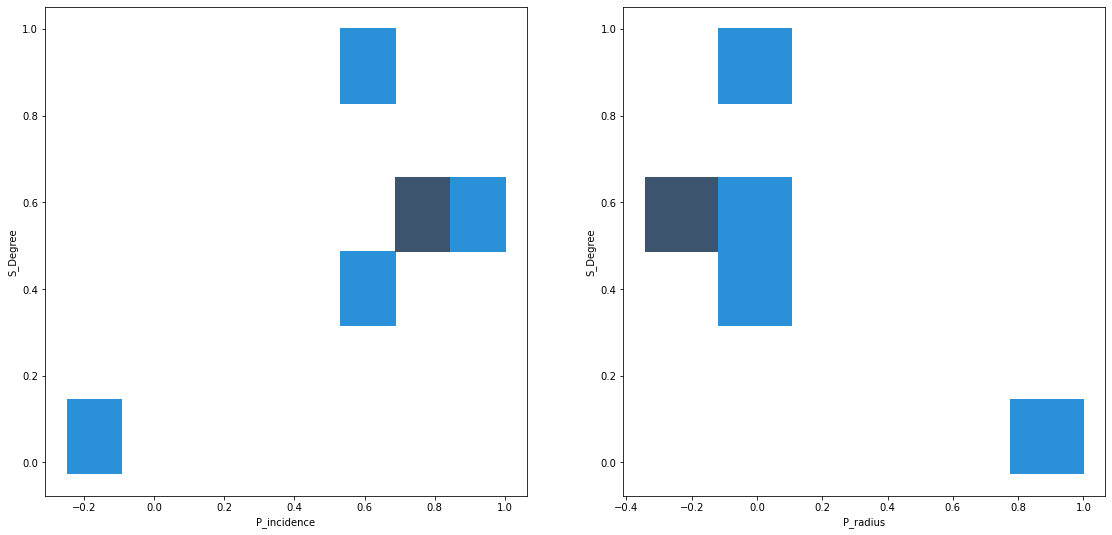

In [42]:
plt.figure(figsize=(19,9))
plt.subplot(1,2,1)
sns.histplot(x = 'P_incidence', y = 'S_Degree', data = corr)
plt.subplot(1,2,2)
sns.histplot(x = 'P_radius', y = 'S_Degree', data = corr)

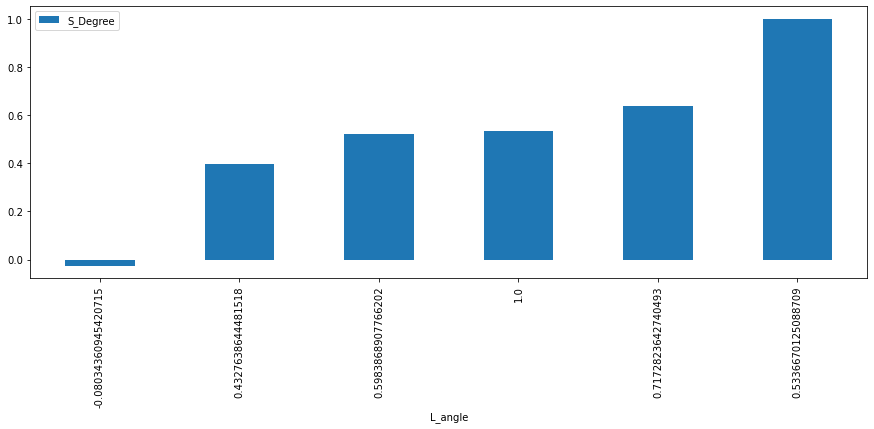

In [43]:
corr.groupby(by=['L_angle'])['S_Degree'].sum().reset_index().sort_values(['S_Degree']).tail(10).plot(x='L_angle',
                                                                                                           y='S_Degree',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

# multivariate analysis

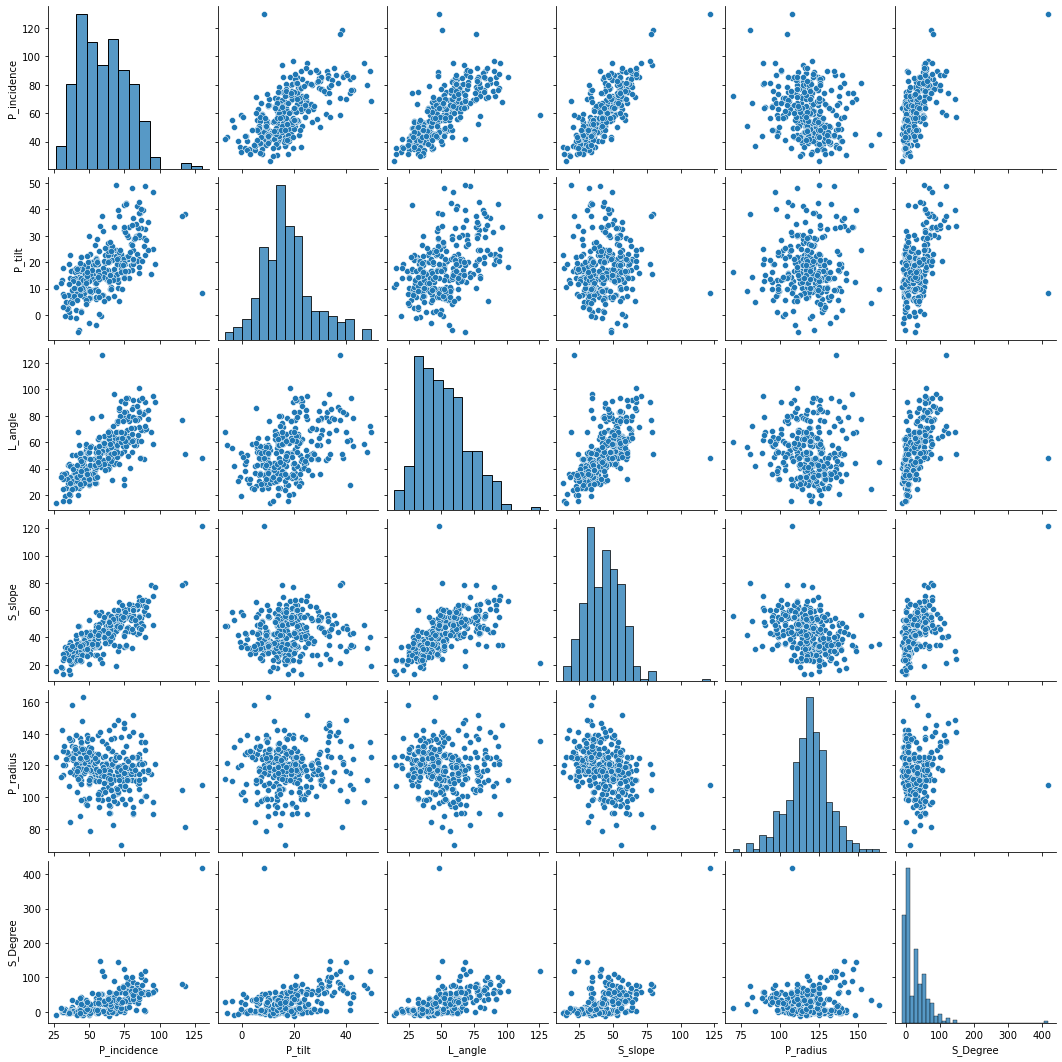

In [44]:
sns.pairplot(data0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


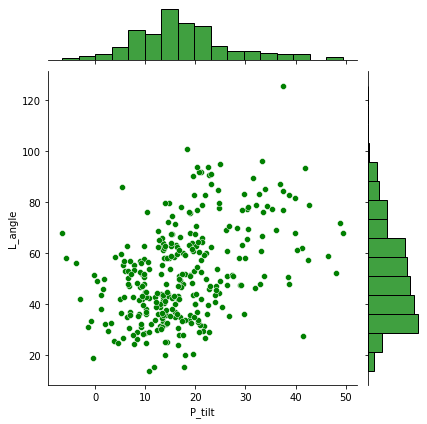

In [45]:
sns.jointplot(data0['P_tilt'],data0['L_angle'],color='green');

In [46]:
# Plots the scatter plot using two variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_incidence', ylabel='L_angle'>

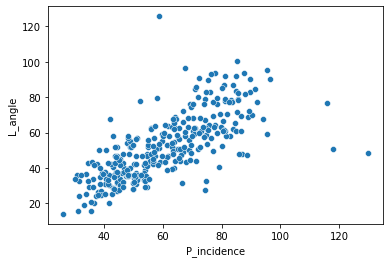

In [47]:
sns.scatterplot(data0['P_incidence'], data0['L_angle'])

In [48]:
# plot the correlation coefficients as a heatmap

<AxesSubplot:>

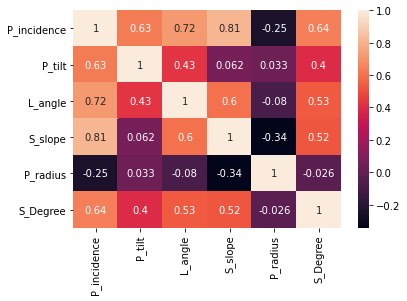

In [49]:
sns.heatmap(data0.corr(), annot=True)

In [50]:
X = data0.drop(labels= "Class" , axis = 1)
y = data0["Class"]
X.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

In [51]:
XScaled  = X.apply(zscore) 
XScaled.describe()

P_incidence        P_tilt       L_angle       S_slope      P_radius  \
count  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02   
mean   8.702716e-17  2.326096e-16  1.980495e-16  5.121351e-17 -6.274551e-16   
std    1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00   
min   -1.996010e+00 -2.411664e+00 -2.047652e+00 -2.207741e+00 -3.597963e+00   
25%   -8.173982e-01 -6.881138e-01 -8.060267e-01 -7.168418e-01 -5.423830e-01   
50%   -1.049246e-01 -1.186061e-01 -1.278621e-01 -4.095971e-02  2.613767e-02   
75%    7.194643e-01  4.581158e-01  5.975493e-01  7.269414e-01  5.676209e-01   
max    4.029206e+00  3.191402e+00  3.984615e+00  5.855771e+00  3.395818e+00   

           S_Degree  
count  3.100000e+02  
mean  -8.156558e-17  
std    1.001617e+00  
min   -9.961725e-01  
25%   -6.585073e-01  
50%   -3.874502e-01  
75%    3.997679e-01  
max    1.046035e+01

In [52]:
# Splitting data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

#Build kNN Model


In [55]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [56]:
# Evaluate Performance of kNN Model

In [57]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [58]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

In [59]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7526881720430108

In [ ]:
 # calculate accuracy measures and confusion matrix

Confusion Matrix


<AxesSubplot:>

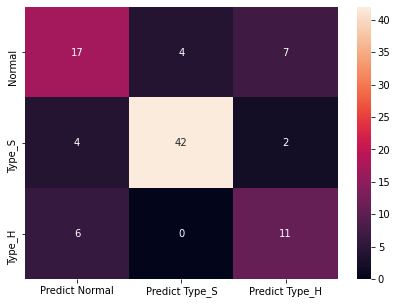

In [61]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_S", "Type_H"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_S", "Type_H"]],
                  columns = [i for i in ["Predict Normal","Predict Type_S", "Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [62]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

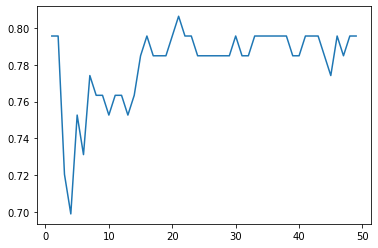

In [63]:
plt.plot(range(1,50),scores)

#Conclusion:-

The  accuracy measures of the model 75%
To find the best fit line of the model
The find the knn near the nighbours is find nearst values 

# part:- 2

#• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.

#• DATA DESCRIPTION: The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

#• PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

Steps and tasks
1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.

2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values.

3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

4. Data pre-processing:
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.

5. Model training, testing and tuning:
• Design and train a Logistic regression and Naive Bayes classifiers.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model.

6. Conclusion and improvisation:
• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
bank to perform a better data analysis in future.


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [66]:
data1 = pd.read_csv('Part2 - Data1.csv')

In [67]:
data1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [68]:
data1.shape

(5000, 8)

In [69]:
data1.size

40000

In [70]:
data2 = pd.read_csv('Part2 -Data2.csv')

In [71]:
data2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [72]:
data2.shape

(5000, 7)

In [73]:
data2.size

35000

In [74]:
data0 = pd.merge(data1, data2, how='outer')

In [75]:
data0.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [76]:
data0.shape

(5000, 14)

In [77]:
data0.size

70000

In [78]:
data0.describe().transpose()

count          mean          std     min       25%  \
ID                   5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                  5000.0     45.338400    11.463166    23.0     35.00   
CustomerSince        5000.0     20.104600    11.467954    -3.0     10.00   
HighestSpend         5000.0     73.774200    46.033729     8.0     39.00   
ZipCode              5000.0  93152.503000  2121.852197  9307.0  91911.00   
HiddenScore          5000.0      2.396400     1.147663     1.0      1.00   
MonthlyAverageSpend  5000.0      1.937938     1.747659     0.0      0.70   
Level                5000.0      1.881000     0.839869     1.0      1.00   
Mortgage             5000.0     56.498800   101.713802     0.0      0.00   
Security             5000.0      0.104400     0.305809     0.0      0.00   
FixedDepositAccount  5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking      5000.0      0.596800     0.490589     0.0      0.00   
CreditCard           5000.0      0.294000     0.455637     0.0      0.00   
LoanOnCard           4980.0      0.096386     0.295149     0.0      0.00   

                         50%       75%      max  
ID                    2500.5   3750.25   5000.0  
Age                     45.0     55.00     67.0  
CustomerSince           20.0     30.00     43.0  
HighestSpend            64.0     98.00    224.0  
ZipCode              93437.0  94608.00  96651.0  
HiddenScore              2.0      3.00      4.0  
MonthlyAverageSpend      1.5      2.50     10.0  
Level                    2.0      3.00      3.0  
Mortgage                 0.0    101.00    635.0  
Security                 0.0      0.00      1.0  
FixedDepositAccount      0.0      0.00      1.0  
InternetBanking          1.0      1.00      1.0  
CreditCard               0.0      1.00      1.0  
LoanOnCard               0.0      0.00      1.0

In [79]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {data0.shape}")
totalrows=data0.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")


 Shape of the dataframe = (5000, 14)
 Total number of rows in the dataset =  5000


In [80]:
# Checking Null colunms
data0_nullcols = data0.isnull().sum()
data0_nullcols


ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [81]:
dupes = data0.duplicated()
sum(dupes)

0

In [82]:
data0.isnull().sum().sum()

20

In [83]:
# Checking data type of each colunm to check if any type needs to be changed
data0.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [84]:
# Checking basic details of the data
data0.describe()

ID          Age  CustomerSince  HighestSpend       ZipCode  \
count  5000.000000  5000.000000    5000.000000   5000.000000   5000.000000   
mean   2500.500000    45.338400      20.104600     73.774200  93152.503000   
std    1443.520003    11.463166      11.467954     46.033729   2121.852197   
min       1.000000    23.000000      -3.000000      8.000000   9307.000000   
25%    1250.750000    35.000000      10.000000     39.000000  91911.000000   
50%    2500.500000    45.000000      20.000000     64.000000  93437.000000   
75%    3750.250000    55.000000      30.000000     98.000000  94608.000000   
max    5000.000000    67.000000      43.000000    224.000000  96651.000000   

       HiddenScore  MonthlyAverageSpend        Level     Mortgage  \
count  5000.000000          5000.000000  5000.000000  5000.000000   
mean      2.396400             1.937938     1.881000    56.498800   
std       1.147663             1.747659     0.839869   101.713802   
min       1.000000             0.000000     1.000000     0.000000   
25%       1.000000             0.700000     1.000000     0.000000   
50%       2.000000             1.500000     2.000000     0.000000   
75%       3.000000             2.500000     3.000000   101.000000   
max       4.000000            10.000000     3.000000   635.000000   

          Security  FixedDepositAccount  InternetBanking   CreditCard  \
count  5000.000000           5000.00000      5000.000000  5000.000000   
mean      0.104400              0.06040         0.596800     0.294000   
std       0.305809              0.23825         0.490589     0.455637   
min       0.000000              0.00000         0.000000     0.000000   
25%       0.000000              0.00000         0.000000     0.000000   
50%       0.000000              0.00000         1.000000     0.000000   
75%       0.000000              0.00000         1.000000     1.000000   
max       1.000000              1.00000         1.000000     1.000000   

        LoanOnCard  
count  4980.000000  
mean      0.096386  
std       0.295149  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [85]:
data0.dtypes.value_counts()

int64      12
float64     2
dtype: int64

In [86]:
data0.mean()

ID                      2500.500000
Age                       45.338400
CustomerSince             20.104600
HighestSpend              73.774200
ZipCode                93152.503000
HiddenScore                2.396400
MonthlyAverageSpend        1.937938
Level                      1.881000
Mortgage                  56.498800
Security                   0.104400
FixedDepositAccount        0.060400
InternetBanking            0.596800
CreditCard                 0.294000
LoanOnCard                 0.096386
dtype: float64

#Univariate Analysis

(array([[ 963.,  967.,  966., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [5000.,    0.,    0., ...,    0.,    0.,    0.],
        [4980.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([-3.000000e+00,  9.635400e+02,  1.930080e+03,  2.896620e+03,
         3.863160e+03,  4.829700e+03,  5.796240e+03,  6.762780e+03,
         7.729320e+03,  8.695860e+03,  9.662400e+03,  1.062894e+04,
         1.159548e+04,  1.256202e+04,  1.352856e+04,  1.449510e+04,
         1.546164e+04,  1.642818e+04,  1.739472e+04,  1.836126e+04,
         1.932780e+04,  2.029434e+04,  2.126088e+04,  2.222742e+04,
         2.319396e+04,  2.416050e+04,  2.512704e+04,  2.609358e+04,
         2.706012e+04,  2.802666e+04,  2.899320e+04,  2.995974e+04,
         3.092628e+04,  3.189282e+04,  3.285936e+04,  3.382590e+04,
         3.479244e+04,  3.57589

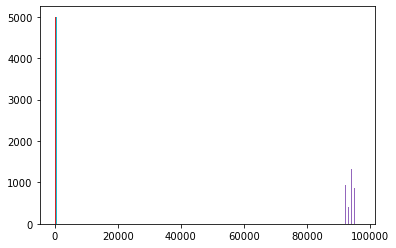

In [87]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(data0, bins=100)

<AxesSubplot:ylabel='Density'>

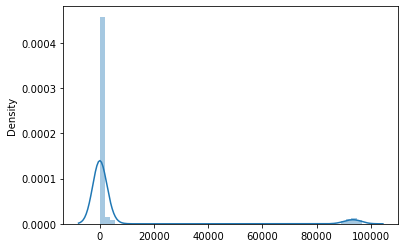

In [88]:
sns.distplot(data0) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

<AxesSubplot:ylabel='Density'>

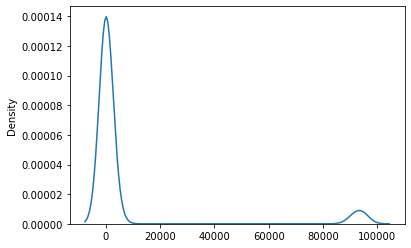

In [89]:
sns.distplot(data0, hist=False)

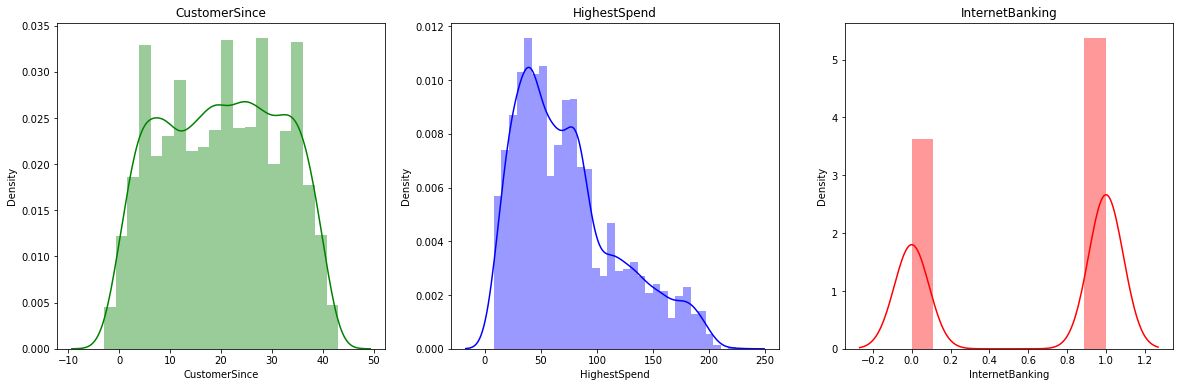

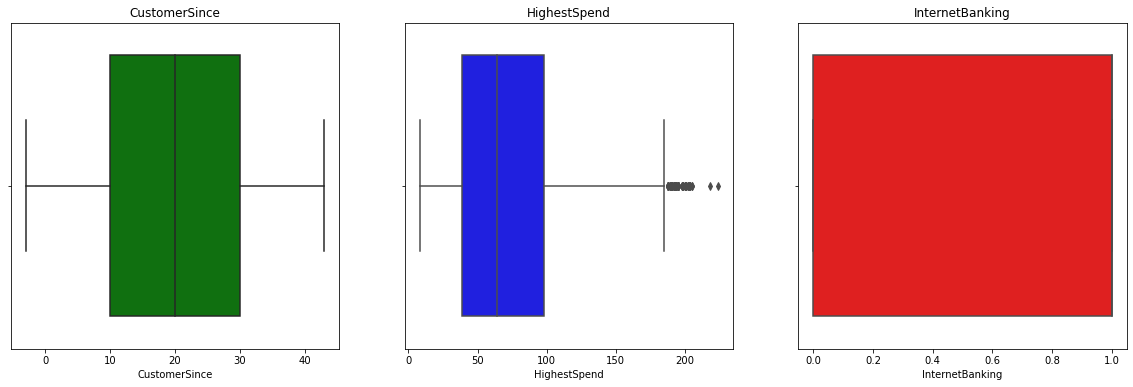

In [90]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('CustomerSince')
sns.distplot(data0['CustomerSince'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('HighestSpend')
sns.distplot(data0['HighestSpend'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.distplot(data0['InternetBanking'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('CustomerSince')
sns.boxplot(data0['CustomerSince'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('HighestSpend')
sns.boxplot(data0['HighestSpend'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.boxplot(data0['InternetBanking'],orient='vertical',color='red')


plt.show()

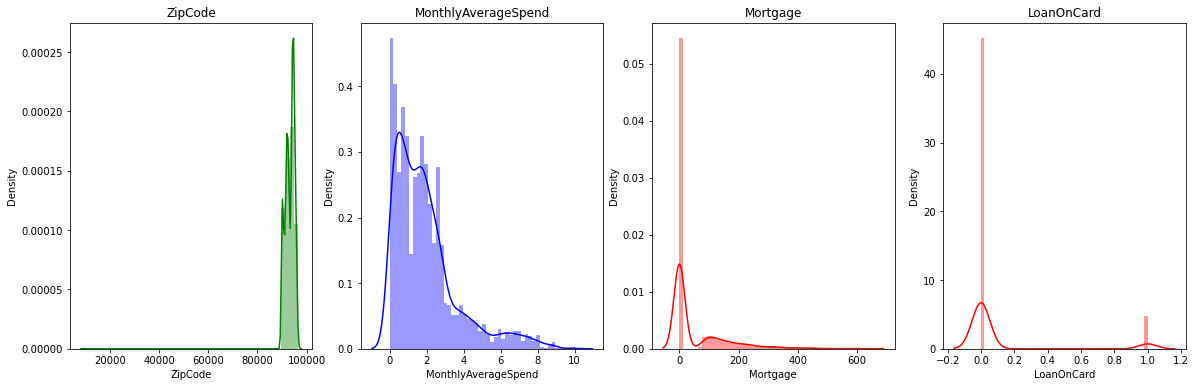

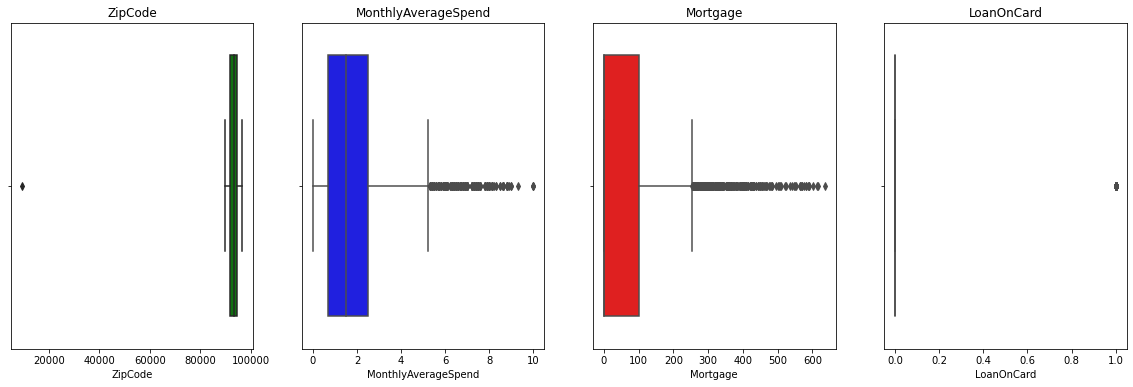

In [91]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('ZipCode')
sns.distplot(data0['ZipCode'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.distplot(data0['MonthlyAverageSpend'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.distplot(data0['Mortgage'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.distplot(data0['LoanOnCard'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('ZipCode')
sns.boxplot(data0['ZipCode'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.boxplot(data0['MonthlyAverageSpend'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.boxplot(data0['Mortgage'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.boxplot(data0['LoanOnCard'],orient='vertical',color='red')



plt.show()

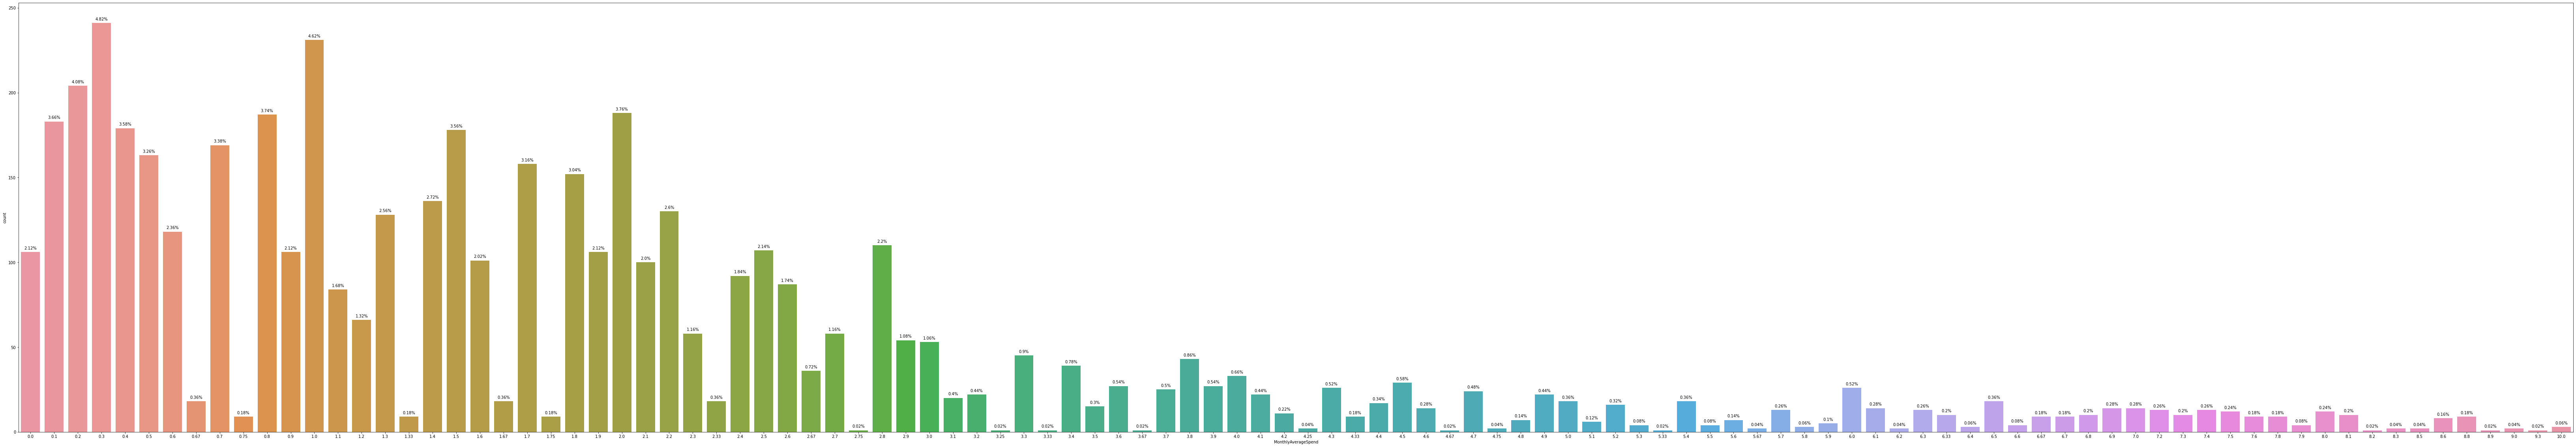

In [92]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(data0['MonthlyAverageSpend'].unique()) + 8
fig.set_size_inches(width , 20)
ax=sns.countplot(data = data0, x= 'MonthlyAverageSpend') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data0)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


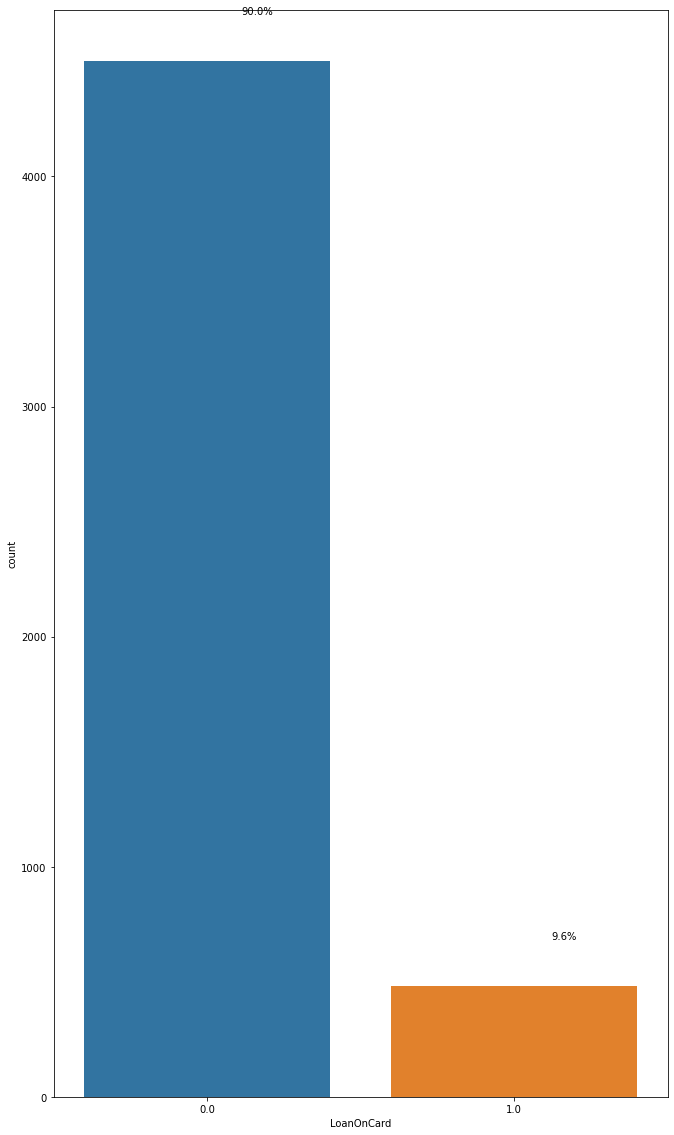

In [93]:
fig, ax = plt.subplots(figsize=(20,9))
width = len(data0['LoanOnCard'].unique()) + 8
fig.set_size_inches(width , 20)
ax=sns.countplot(data = data0, x= 'LoanOnCard') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(data0)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(50, 50), textcoords='offset points')

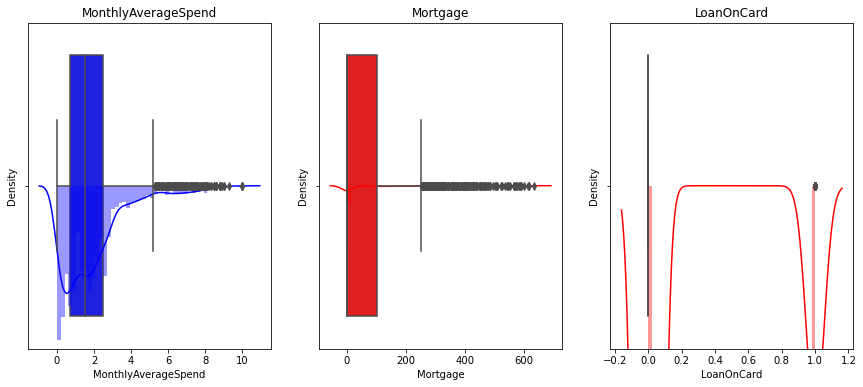

In [94]:
plt.figure(figsize=(20,6))

# subplot 1
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.distplot(data0['MonthlyAverageSpend'],color='blue')

# subplot 2
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.distplot(data0['Mortgage'],color='red')

# subplot 3
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.distplot(data0['LoanOnCard'],color='red')



# subplot 1
plt.subplot(1, 4, 2)
plt.title('MonthlyAverageSpend')
sns.boxplot(data0['MonthlyAverageSpend'],orient='vertical',color='blue')

# subplot 2
plt.subplot(1, 4, 3)
plt.title('Mortgage')
sns.boxplot(data0['Mortgage'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 4)
plt.title('LoanOnCard')
sns.boxplot(data0['LoanOnCard'],orient='vertical',color='red')



plt.show()

In [95]:
#bivariate Analysis

In [96]:
rs=np.random.RandomState(0)
df=pd.DataFrame(rs.rand(10,10))
corr=data0.corr()

In [97]:
corr.style

In [98]:
corr.dtypes

ID                     float64
Age                    float64
CustomerSince          float64
HighestSpend           float64
ZipCode                float64
HiddenScore            float64
MonthlyAverageSpend    float64
Level                  float64
Mortgage               float64
Security               float64
FixedDepositAccount    float64
InternetBanking        float64
CreditCard             float64
LoanOnCard             float64
dtype: object

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='InternetBanking'>

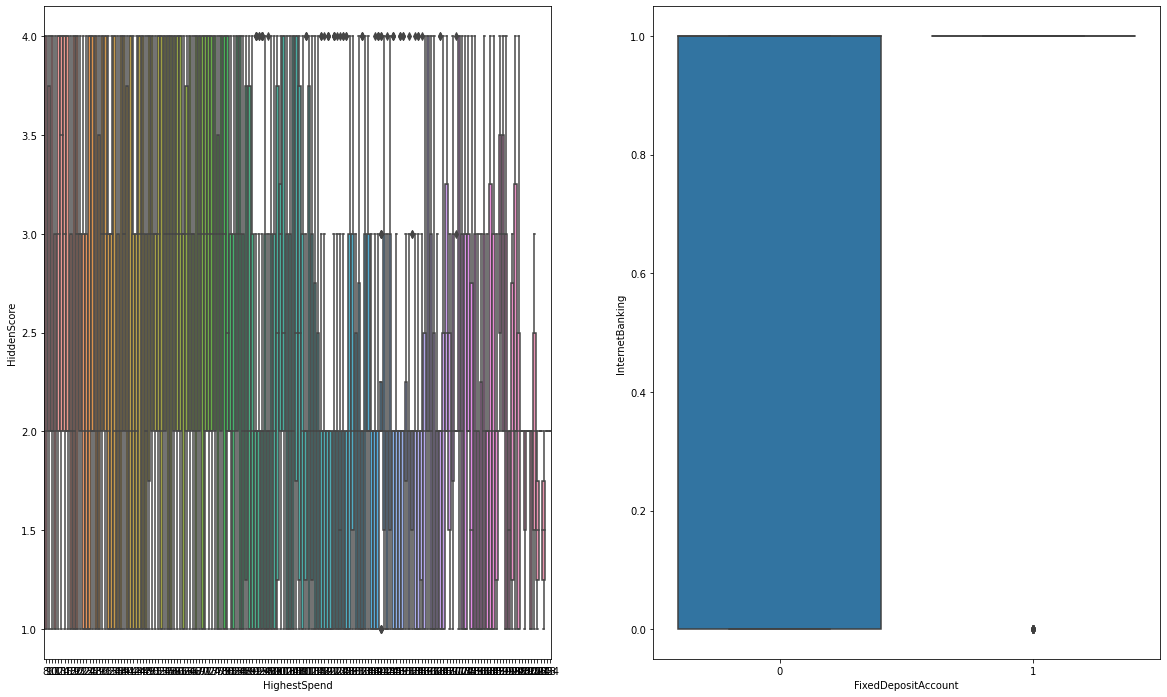

In [99]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'HighestSpend', y = 'HiddenScore', data = data0)
plt.subplot(1,2,2)
sns.boxplot(x = 'FixedDepositAccount', y = 'InternetBanking', data = data0)

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='FixedDepositAccount'>

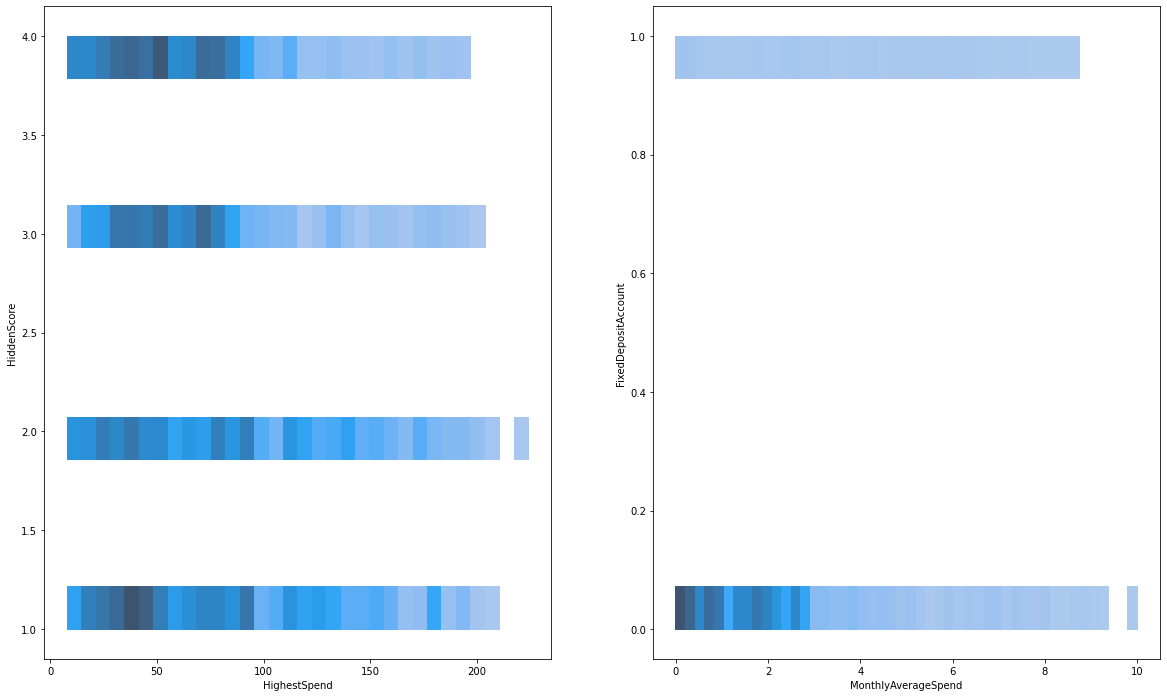

In [100]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.histplot(x = 'HighestSpend', y = 'HiddenScore', data = data0)
plt.subplot(1,2,2)
sns.histplot(x = 'MonthlyAverageSpend', y = 'FixedDepositAccount', data = data0)

#multivariate analysis

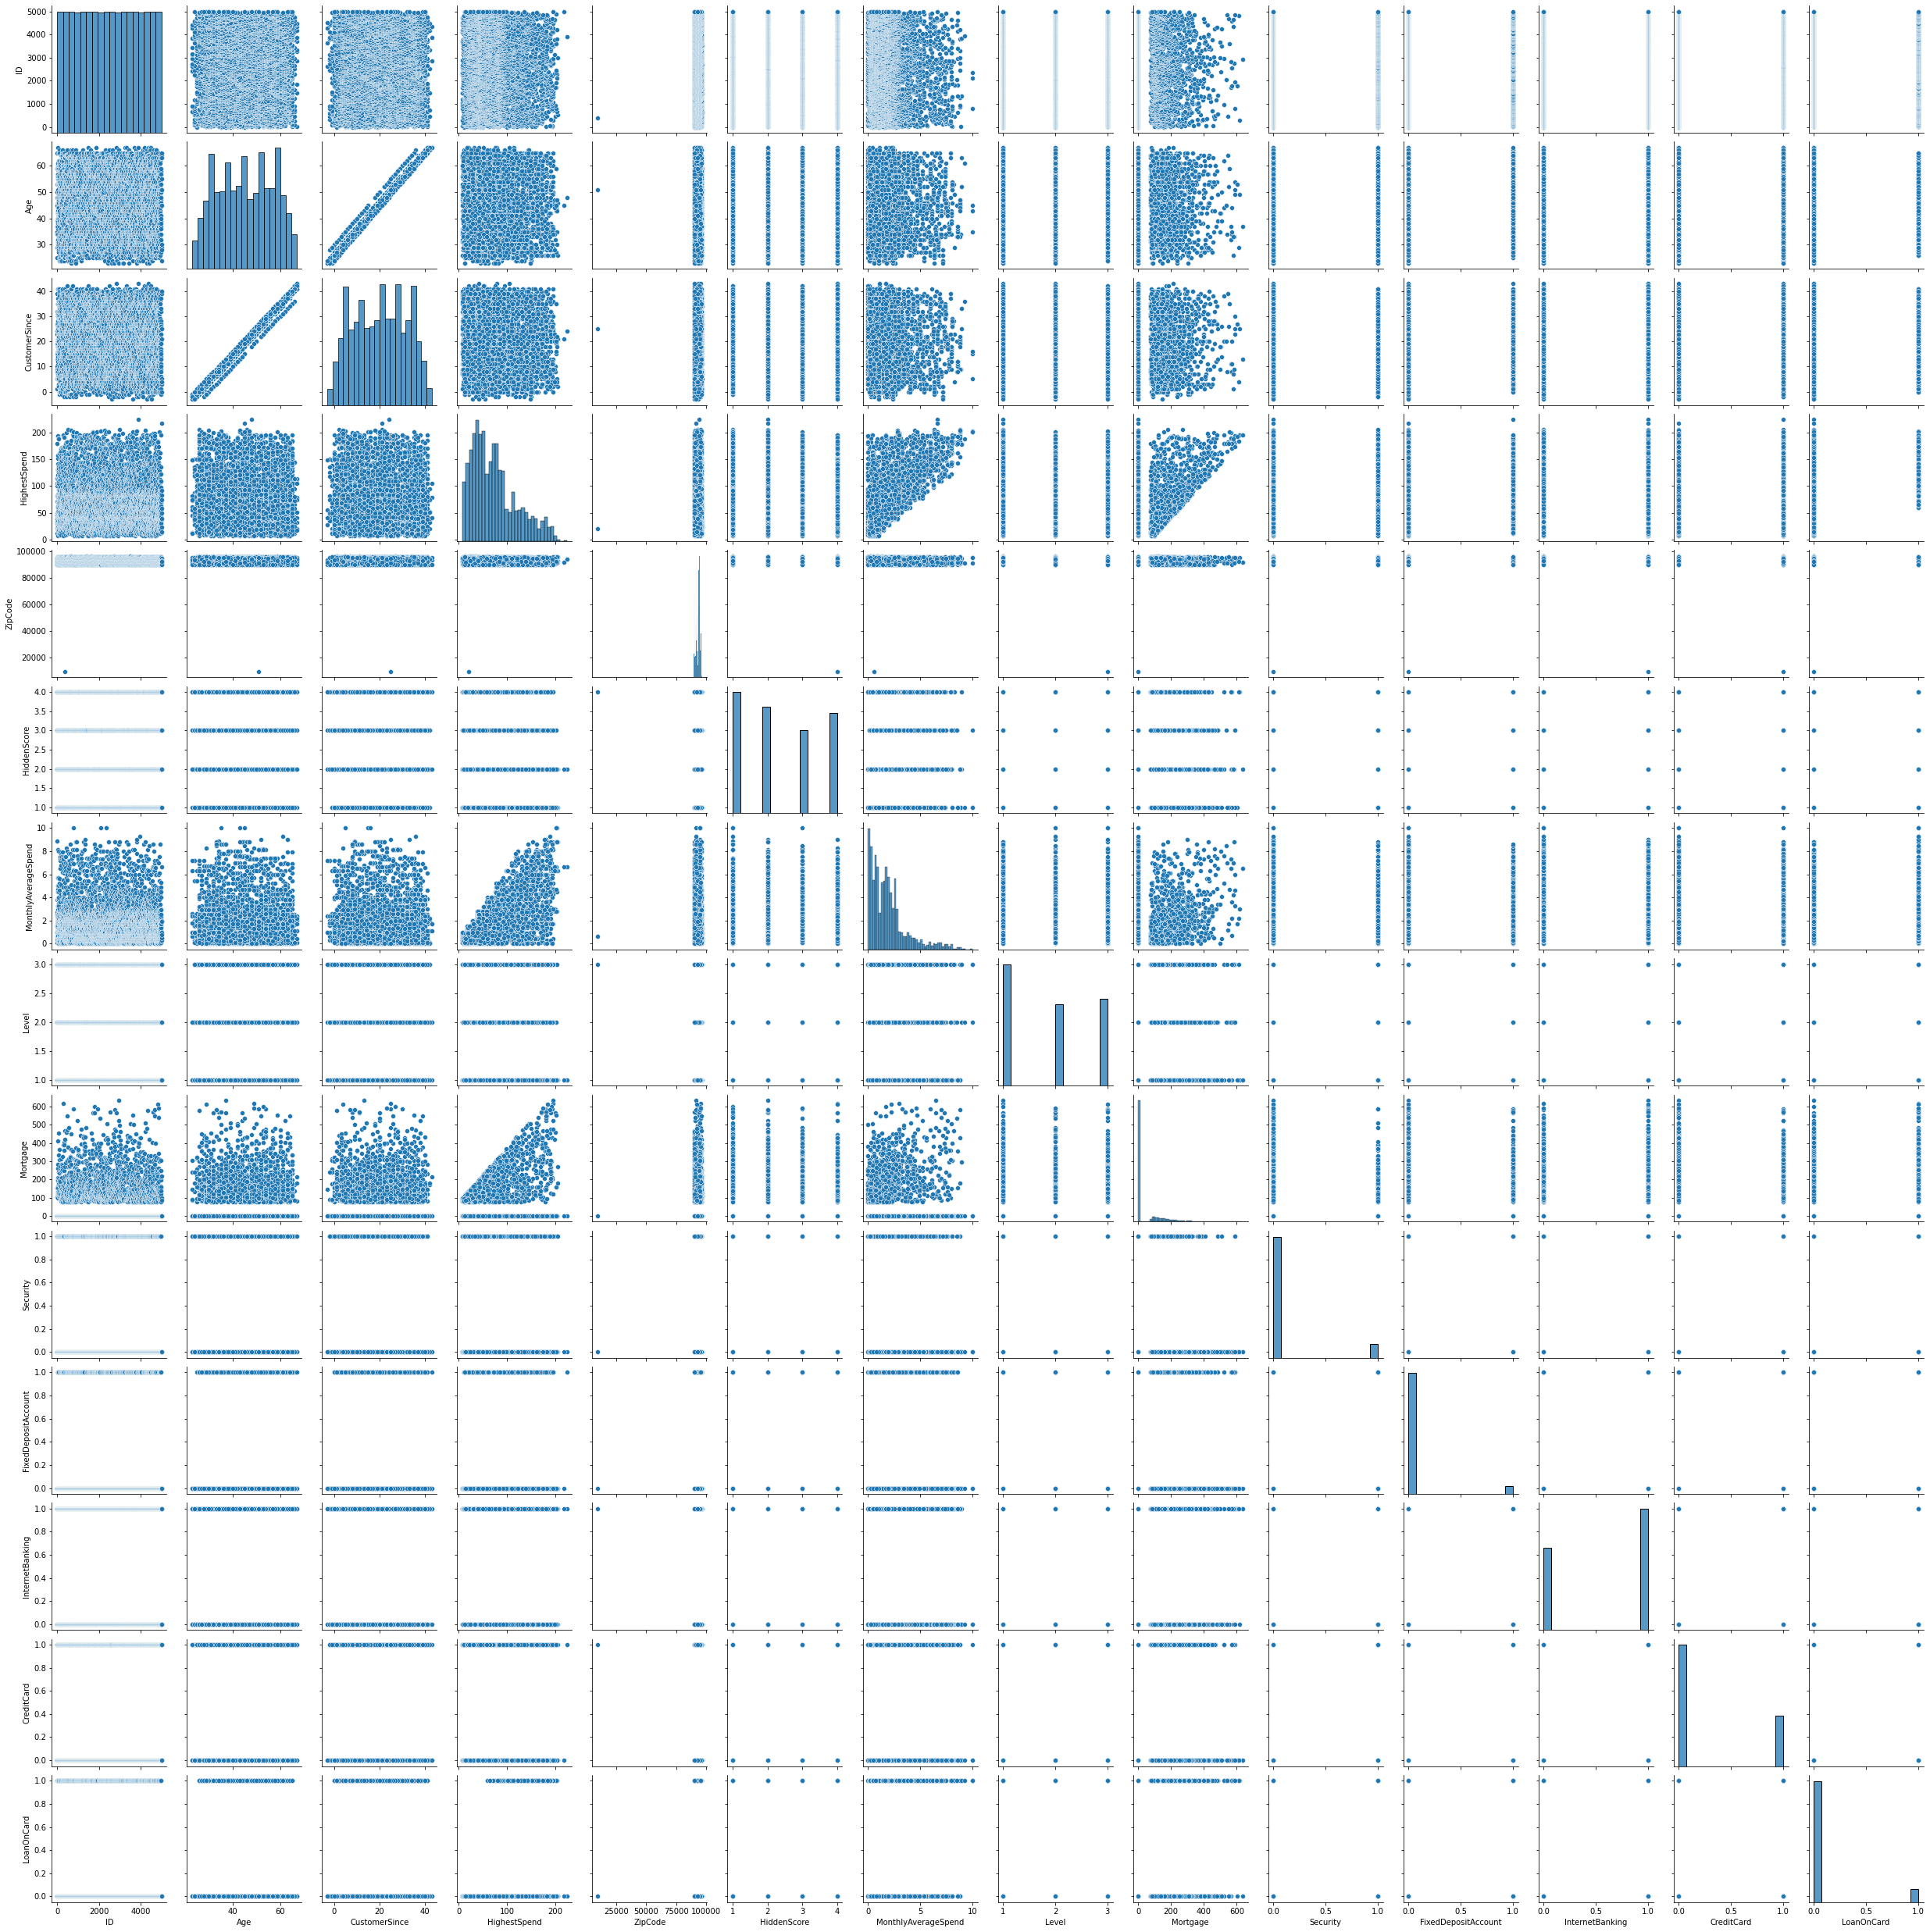

In [102]:
sns.pairplot(data0)

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='FixedDepositAccount'>

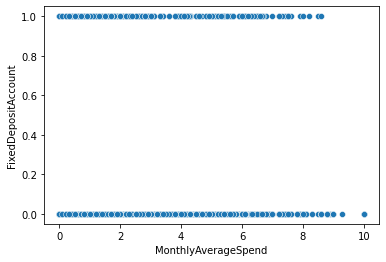

In [103]:
sns.scatterplot(data0['MonthlyAverageSpend'],data0['FixedDepositAccount'])

<AxesSubplot:>

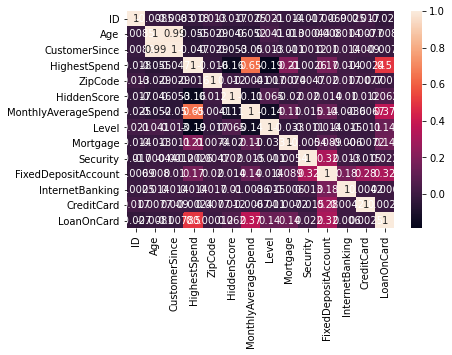

In [104]:
sns.heatmap(data0.corr(),annot=True)

In [105]:
X=data0.drop(labels='LoanOnCard',axis=1)
y=data0['LoanOnCard']
X.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  
0                0           0  
1                0           0  
2                0           0  
3                0           0  
4                0           1

In [106]:
np.random.seed(0)
data0_train,data0_test = train_test_split(data0, train_size=0.7, test_size=0.30, random_state=70)

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [109]:
# Apply scaler() to all the columns except the 'dummy' variables

In [110]:
vars = ['ID', 'Age', 'CustomerSince', 'HiddenScore', 'HiddenScore'
            ,'InternetBanking', 'CreditCard']

data0[vars] = scaler.fit_transform(data0[vars])
data0.fillna(0)
data0.head()

ID       Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0  0.0000  0.045455       0.086957            49    91107     1.000000   
1  0.0002  0.500000       0.478261            34    90089     0.666667   
2  0.0004  0.363636       0.391304            11    94720     0.000000   
3  0.0006  0.272727       0.260870           100    94112     0.000000   
4  0.0008  0.272727       0.239130            45    91330     1.000000   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0              0.0         0.0         NaN  
1              0.0         0.0         NaN  
2              0.0         0.0         NaN  
3              0.0         0.0         NaN  
4              0.0         1.0         NaN

In [111]:
data0.isnull().values.any()

True

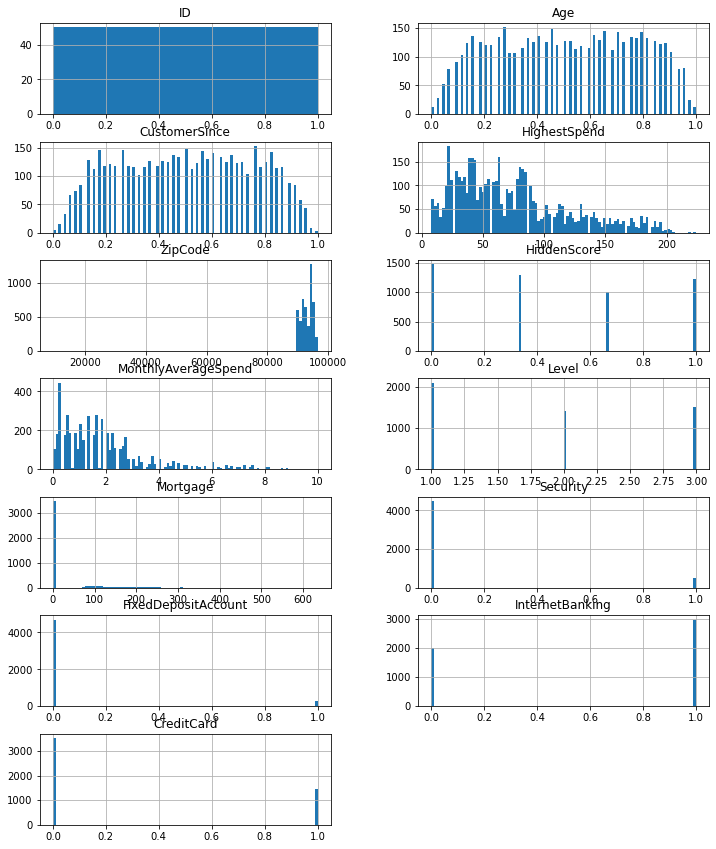

In [112]:
columns = list(data0)[0:-1] # Excluding Outcome column which has only 
data0[columns].hist(stacked=True, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

#Identify Correlation in data

In [113]:
data0.corr() 

ID       Age  CustomerSince  HighestSpend  \
ID                   1.000000 -0.008473      -0.008326     -0.017695   
Age                 -0.008473  1.000000       0.994215     -0.055269   
CustomerSince       -0.008326  0.994215       1.000000     -0.046574   
HighestSpend        -0.017695 -0.055269      -0.046574      1.000000   
ZipCode              0.013432 -0.029216      -0.028626     -0.016410   
HiddenScore         -0.016797 -0.046418      -0.052563     -0.157501   
MonthlyAverageSpend -0.024675 -0.052012      -0.050077      0.645984   
Level                0.021463  0.041334       0.013152     -0.187524   
Mortgage            -0.013920 -0.012539      -0.010582      0.206806   
Security            -0.016972 -0.000436      -0.001232     -0.002616   
FixedDepositAccount -0.006909  0.008043       0.010353      0.169738   
InternetBanking     -0.002528  0.013702       0.013898      0.014206   
CreditCard           0.017028  0.007681       0.008967     -0.002385   
LoanOnCard          -0.027188 -0.008147      -0.007801      0.502626   

                      ZipCode  HiddenScore  MonthlyAverageSpend     Level  \
ID                   0.013432    -0.016797            -0.024675  0.021463   
Age                 -0.029216    -0.046418            -0.052012  0.041334   
CustomerSince       -0.028626    -0.052563            -0.050077  0.013152   
HighestSpend        -0.016410    -0.157501             0.645984 -0.187524   
ZipCode              1.000000     0.011778            -0.004061 -0.017377   
HiddenScore          0.011778     1.000000            -0.109275  0.064929   
MonthlyAverageSpend -0.004061    -0.109275             1.000000 -0.136124   
Level               -0.017377     0.064929            -0.136124  1.000000   
Mortgage             0.007383    -0.020445             0.109905 -0.033327   
Security             0.004704     0.019994             0.015086 -0.010812   
FixedDepositAccount  0.019972     0.014110             0.136534  0.013934   
InternetBanking      0.016990     0.010354            -0.003611 -0.015004   
CreditCard           0.007691     0.011588            -0.006689 -0.011014   
LoanOnCard           0.000120     0.061761             0.366912  0.137010   

                     Mortgage  Security  FixedDepositAccount  InternetBanking  \
ID                  -0.013920 -0.016972            -0.006909        -0.002528   
Age                 -0.012539 -0.000436             0.008043         0.013702   
CustomerSince       -0.010582 -0.001232             0.010353         0.013898   
HighestSpend         0.206806 -0.002616             0.169738         0.014206   
ZipCode              0.007383  0.004704             0.019972         0.016990   
HiddenScore         -0.020445  0.019994             0.014110         0.010354   
MonthlyAverageSpend  0.109905  0.015086             0.136534        -0.003611   
Level               -0.033327 -0.010812             0.013934        -0.015004   
Mortgage             1.000000 -0.005411             0.089311        -0.005995   
Security            -0.005411  1.000000             0.317034         0.012627   
FixedDepositAccount  0.089311  0.317034             1.000000         0.175880   
InternetBanking     -0.005995  0.012627             0.175880         1.000000   
CreditCard          -0.007231 -0.015028             0.278644         0.004210   
LoanOnCard           0.141947  0.021982             0.316131         0.006034   

                     CreditCard  LoanOnCard  
ID                     0.017028   -0.027188  
Age                    0.007681   -0.008147  
CustomerSince          0.008967   -0.007801  
HighestSpend          -0.002385    0.502626  
ZipCode                0.007691    0.000120  
HiddenScore            0.011588    0.061761  
MonthlyAverageSpend   -0.006689    0.366912  
Level                 -0.011014    0.137010  
Mortgage              -0.007231    0.141947  
Security              -0.015028    0.021982  
FixedDepositAccount    0.278644    0.316131  
InternetBanking       

In [114]:
# However we want to see correlation in graphical representation so below is function for that

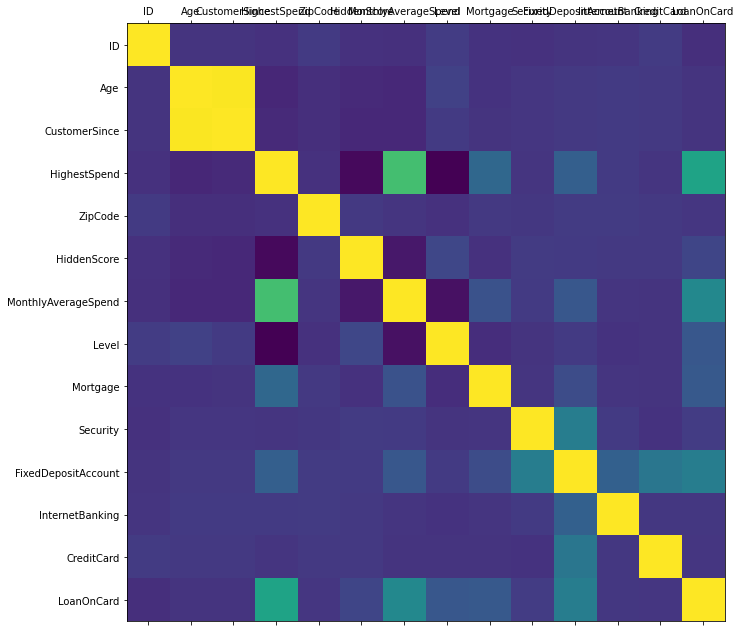

In [115]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(data0)

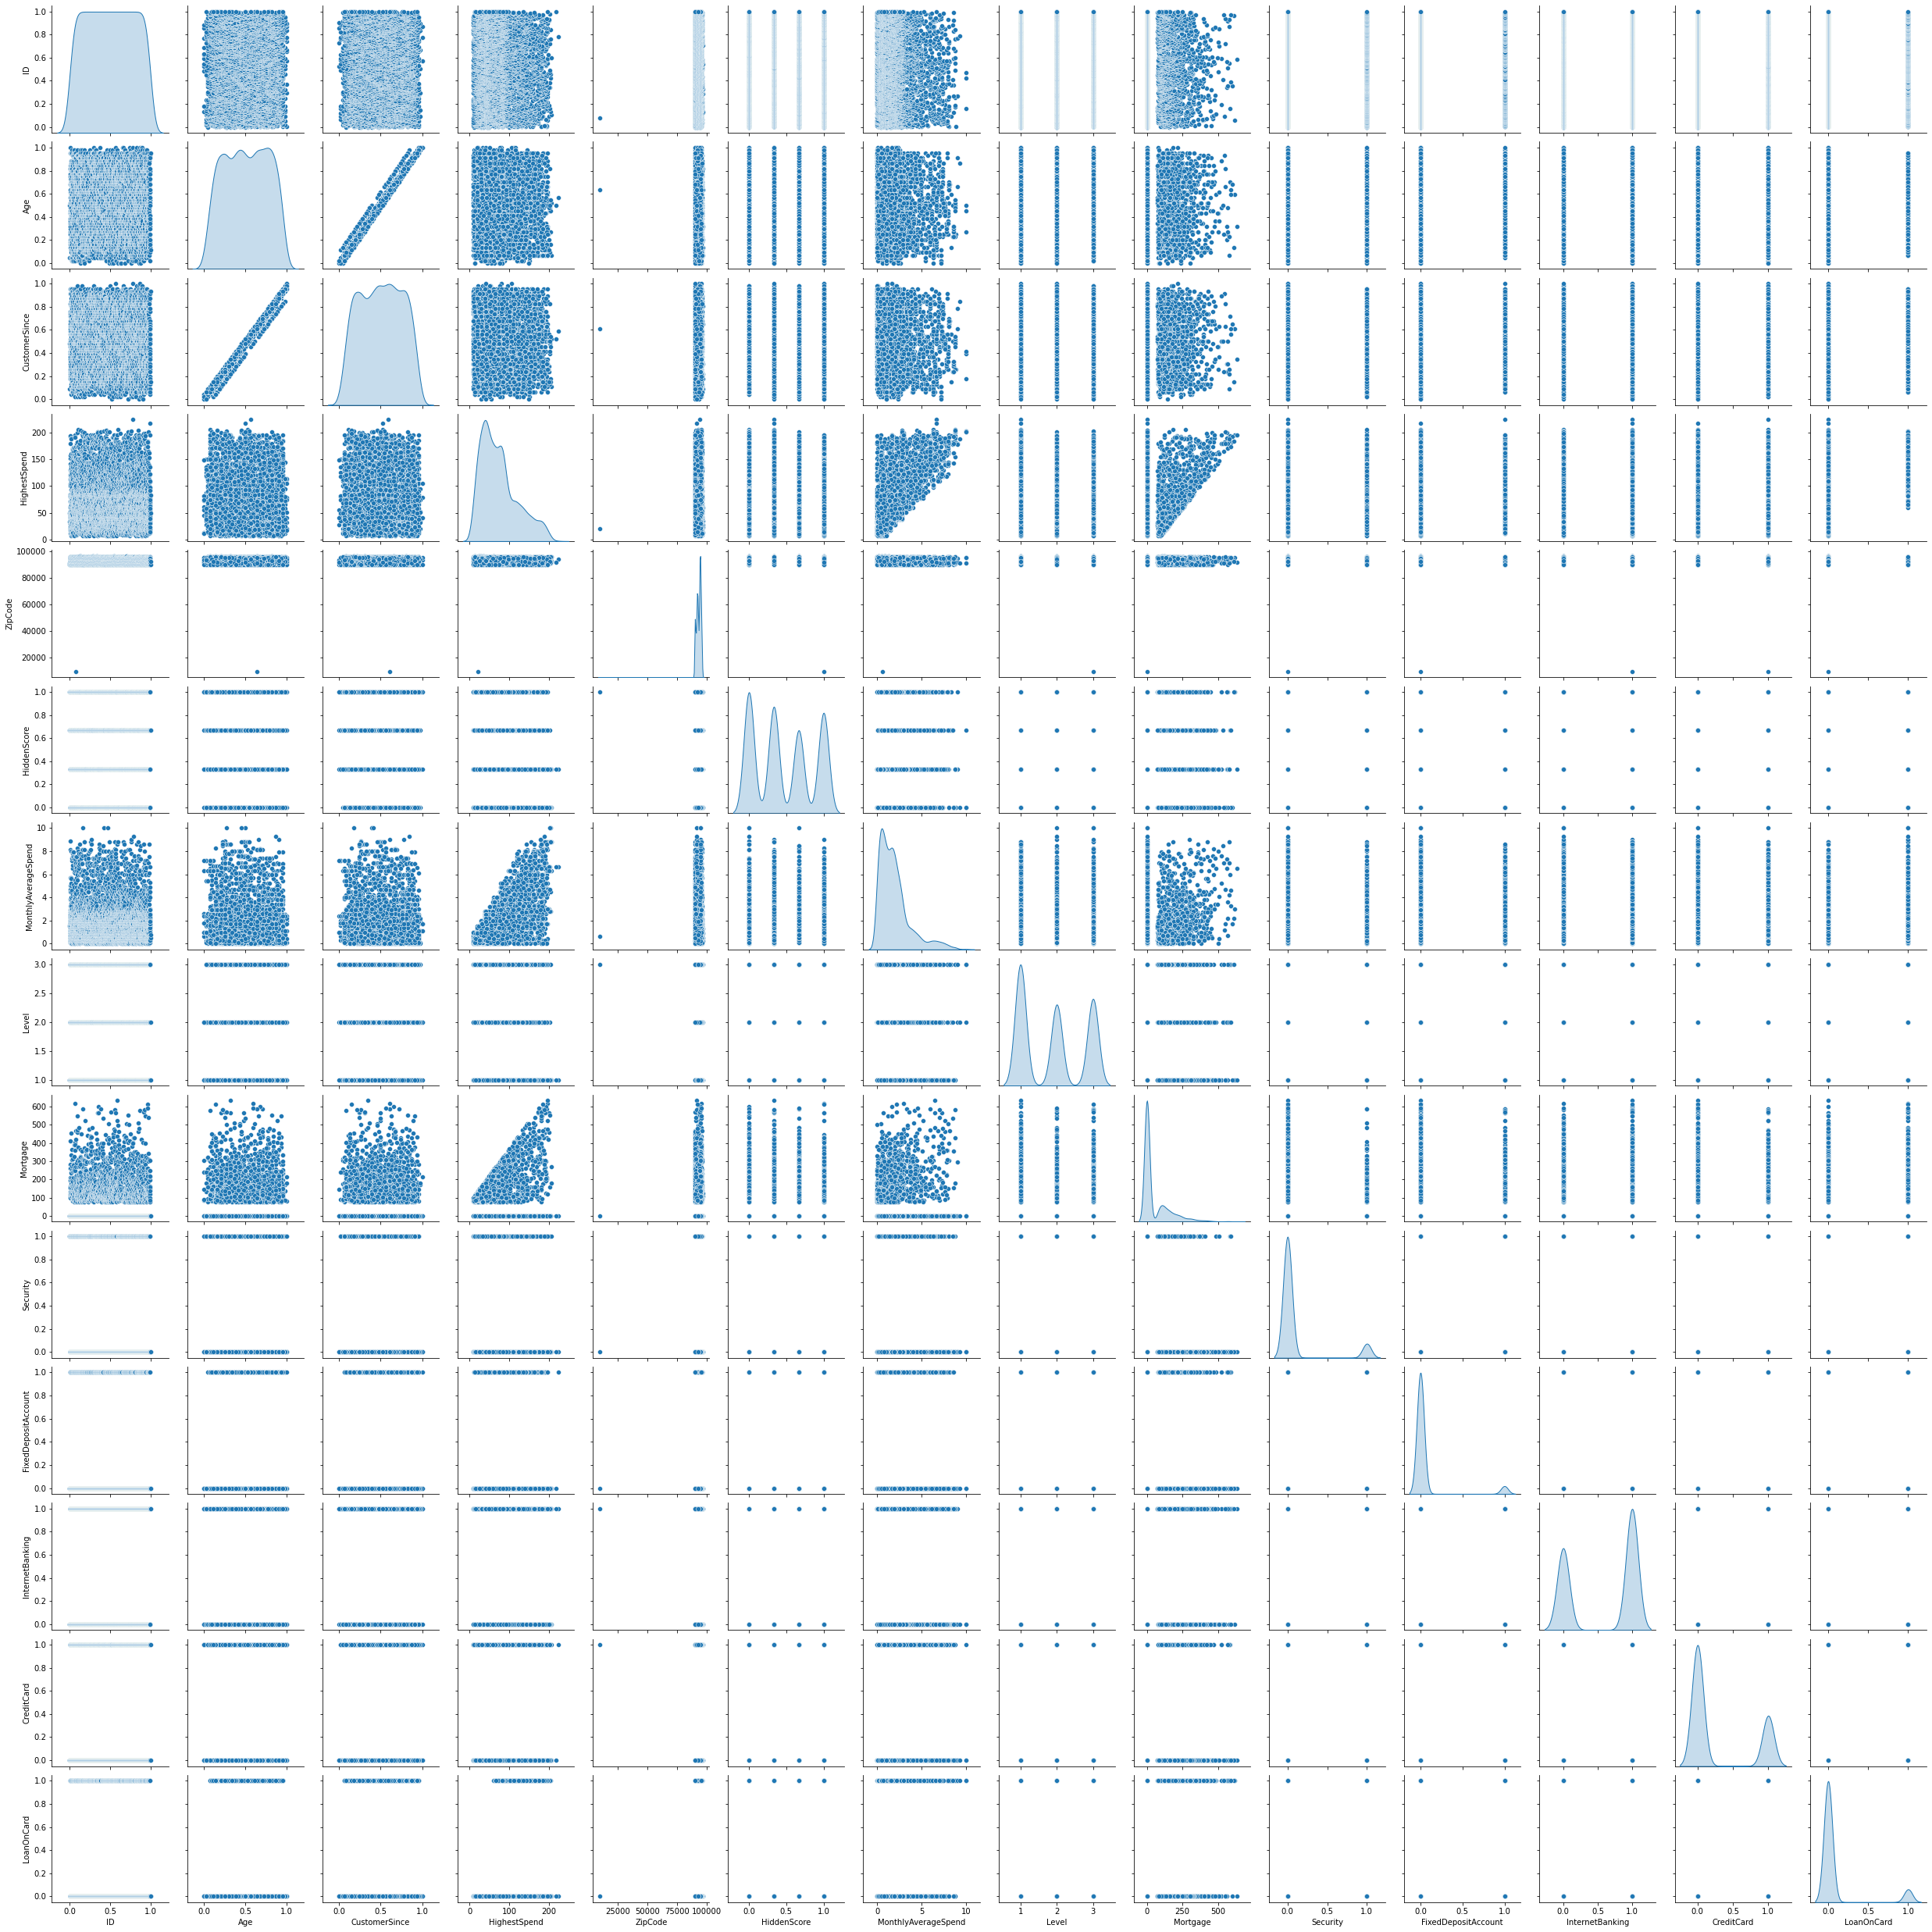

In [116]:
sns.pairplot(data0,diag_kind='kde')

In [117]:
import statistics

statistics.mode(data0["LoanOnCard"])

0.0

In [118]:
data0['LoanOnCard']=data0['LoanOnCard'].fillna(data0['LoanOnCard'].mode()[0])

In [119]:
data0['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [120]:
n_true = len(data0.loc[data0['LoanOnCard'] == True])
n_false = len(data0.loc[data0['LoanOnCard'] == False])
print("Number of true loancards: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false loancards: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true loancards: 480 (9.60%)
Number of false loancards: 4520 (90.40%)


In [121]:
from sklearn.model_selection import train_test_split

X = data0.drop('LoanOnCard',axis=1)     # Predictor feature columns (8 X m)

Y = data0['LoanOnCard']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()


ID       Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
1334  0.266853  0.545455       0.543478            35    94304     0.333333   
4768  0.953791  0.340909       0.369565            39    93118     0.000000   
65    0.013003  0.818182       0.826087           131    91360     0.000000   
177   0.035407  0.136364       0.130435            65    94132     1.000000   
4489  0.897980  0.363636       0.347826            21    95518     0.666667   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
1334                  1.3      1         0         0                    0   
4768                  2.0      2         0         0                    0   
65                    3.8      1         0         0                    0   
177                   1.8      2       244         0                    0   
4489                  0.2      2         0         0                    0   

      InternetBanking  CreditCard  
1334              1.0         0.0  
4768              1.0         0.0  
65                1.0         1.0  
177               0.0         0.0  
4489              1.0         0.0

In [122]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data0.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data0.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [123]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

ID       Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0  0.266853  0.545455       0.543478          35.0  94304.0     0.333333   
1  0.953791  0.340909       0.369565          39.0  93118.0     0.658441   
2  0.013003  0.818182       0.826087         131.0  91360.0     0.658441   
3  0.035407  0.136364       0.130435          65.0  94132.0     1.000000   
4  0.897980  0.363636       0.347826          21.0  95518.0     0.666667   

   MonthlyAverageSpend  Level    Mortgage  Security  FixedDepositAccount  \
0                  1.3    1.0  181.659259       1.0                  1.0   
1                  2.0    2.0  181.659259       1.0                  1.0   
2                  3.8    1.0  181.659259       1.0                  1.0   
3                  1.8    2.0  244.000000       1.0                  1.0   
4                  0.2    2.0  181.659259       1.0                  1.0   

   InternetBanking  CreditCard  
0              1.0         1.0  
1              1.0         1.0  
2              1.0         1.0  
3              1.0         1.0  
4              1.0         1.0

In [124]:
X = data0.drop('LoanOnCard',axis=1)     

Y = data0['LoanOnCard']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

ID       Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
1334  0.266853  0.545455       0.543478            35    94304     0.333333   
4768  0.953791  0.340909       0.369565            39    93118     0.000000   
65    0.013003  0.818182       0.826087           131    91360     0.000000   
177   0.035407  0.136364       0.130435            65    94132     1.000000   
4489  0.897980  0.363636       0.347826            21    95518     0.666667   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
1334                  1.3      1         0         0                    0   
4768                  2.0      2         0         0                    0   
65                    3.8      1         0         0                    0   
177                   1.8      2       244         0                    0   
4489                  0.2      2         0         0                    0   

      InternetBanking  CreditCard  
1334              1.0         0.0  
4768              1.0         0.0  
65                1.0         1.0  
177               0.0         0.0  
4489              1.0         0.0

In [125]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# created the model
data0_model = GaussianNB()

data0_model.fit(x_train, y_train.ravel())

GaussianNB()

In [126]:
data0_train_predict = data0_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, data0_train_predict)))
print()

Model Accuracy: 0.8949



In [127]:
data0_test_predict = data0_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, data0_test_predict)))
print()

Model Accuracy: 0.8827



#confusion_matrix

Confusion Matrix


<AxesSubplot:>

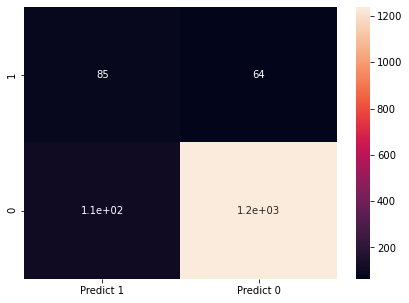

In [128]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, data0_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [129]:
print("Classification Report")
print(metrics.classification_report(y_test, data0_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.57      0.49       149
           0       0.95      0.92      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



#conclusion & improvements

In [ ]:
# We are selecting final model as logistic regression as it performs well in training and testing test.

# Logistic Regression is not affected by overfitting and it is also has good recall value.

# Logistic regression performed well in k-fold cross validation as well.

# Deviation also less in logistic regression.

# Sampling improved to predict minority classes as well

# Suggesting to collect data equally for both the classes.

# Few customers does't have credit card but those customer having loan on card. This data error can be avoided